/home/moth/UCC/Quantum/.quantum/qis/lib/python3.12/site-packages/qutip/solver/solver_base.py:576: FutureWarning: e_ops will be keyword only from qutip 5.3 for all solver
  warnings.warn(


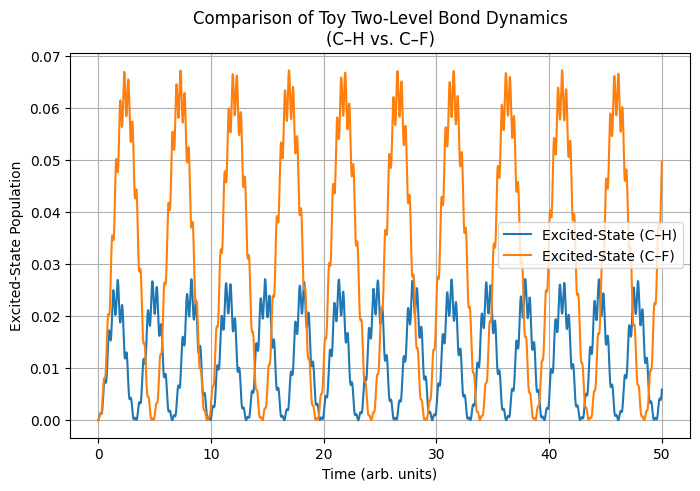

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import (basis, mesolve, sigmax, sigmaz, qeye,Qobj)

def simulate_bond(omega, Omega_Rabi, omega_drive, tlist):
    """
    Returns the time evolution of ground- and excited-state populations
    for a simplified, two-level 'bond' under a time-dependent driving field.
    
    Parameters:
    -----------
    omega       : float
        The 'bond frequency' (energy gap) in radians/sec.
    Omega_Rabi  : float
        strength of the driving amplitude (Rabi frequency).
    omega_drive : float
        The driving frequency for the external probe (driving field).
    tlist       : array-like
        Array of time points for simulation.
    
    Returns:
    --------
    (pop_g, pop_e): tuple of arrays
        Ground and excited-state populations as functions of time.
    """
    # Pauli operators
    sx = sigmax()
    sz = sigmaz()
    # Identity on 2D space
    eye2 = qeye(2)

    # Define the two-level basis states
    g = basis(2, 0)  # ground
    e = basis(2, 1)  # excited

    # Define the Hamiltonian:
    # H0 = 0.5 * omega * sz (the base energy splitting)
    # H_drive = 0.5 * Omega_Rabi * sx * cos(omega_drive * t)
    H0 = 0.5 * omega * sz
    f = lambda t,args : np.cos(omega_drive * t)
    H_drive = [0.5 * Omega_Rabi * sx, f]
    H = [H0, H_drive]
    
    # No collapse operators: we treat this as a closed quantum system
    c_ops = []
    
    # Expectation operators for ground and excited states
    e_ops = [g*g.dag(), e*e.dag()]
    
    # Initial state: all population in ground state
    psi0 = g

    # Solve the time-dependent Schrödinger equation
    args = {'omega_drive': omega_drive}
    result = mesolve(H, psi0, tlist, c_ops, e_ops, args=args)

    # result.expect[0] -> population in ground state
    # result.expect[1] -> population in excited state
    return result.expect[0], result.expect[1]

def main():
    # ------------------------------
    # Simulation parameters
    # ------------------------------
    omega_CH = 1.0 * 2*np.pi   # "bond frequency" for C-H (arbitrary)
    omega_CF = 1.5 * 2*np.pi   # "bond frequency" for C-F (stronger bond)
    
    # Driving (probe) frequency and amplitude
    omega_drive = 1.3 * 2*np.pi
    Omega_Rabi = 0.1 * 2*np.pi
    
    # Time array for simulations
    tlist = np.linspace(0, 50, 10000)
    
    # ------------------------------
    # Run simulations
    # ------------------------------
    pop_g_CH, pop_e_CH = simulate_bond(omega_CH, Omega_Rabi, omega_drive, tlist)
    pop_g_CF, pop_e_CF = simulate_bond(omega_CF, Omega_Rabi, omega_drive, tlist)
    
    # ------------------------------
    # Plot results
    # ------------------------------
    plt.figure(figsize=(8,5))
    plt.plot(tlist, pop_e_CH, label='Excited-State (C–H)')
    plt.plot(tlist, pop_e_CF, label='Excited-State (C–F)')
    
    plt.xlabel('Time (arb. units)')
    plt.ylabel('Excited-State Population')
    plt.title('Comparison of Toy Two-Level Bond Dynamics\n(C–H vs. C–F)')
    plt.legend()
    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    main()

In [5]:

ground = basis(2, 0)  # ground
excite = basis(2, 1)  # excited

Delta = 1
H0 =  - Delta * sigmaz()
w=1

def Omega(t,args):
    return 1 #np.sin(t)**2


def component(t,args):
    return Omega(t,args) * np.exp( 1j *w * t)
def componentbar(t,args):
    return Omega(t,args) * np.exp( -1j *w * t)

TR = Qobj(np.array([[0,1],[0,0]]))
H_drivetop = [TR , componentbar]
BL = Qobj(np.array([[0,0],[1,0]]))
H_drivebottom = [BL , component]

H = [H0, H_drivetop,H_drivebottom]


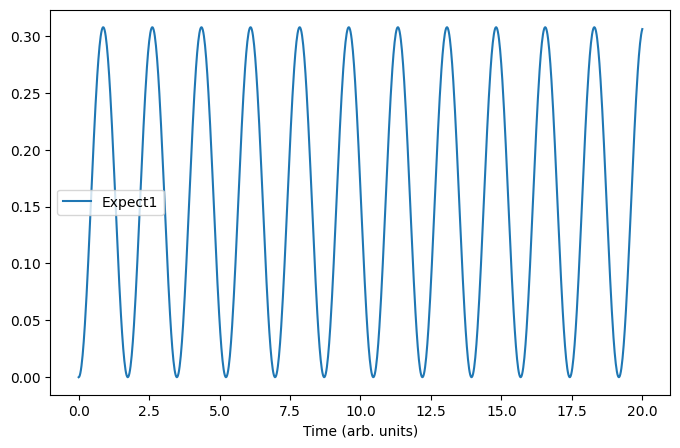

In [6]:
c_ops = []   
e_ops = [ground*ground.dag(), excite*excite.dag()]
psi0 = ground

args = {}


tlist = np.linspace(0, 20, 1000)



result = mesolve(H, psi0, tlist, c_ops, e_ops, args=args)


plt.figure(figsize=(8,5))
plt.plot(tlist, result.expect[1], label='Expect1')
    
plt.xlabel('Time (arb. units)')
plt.legend()


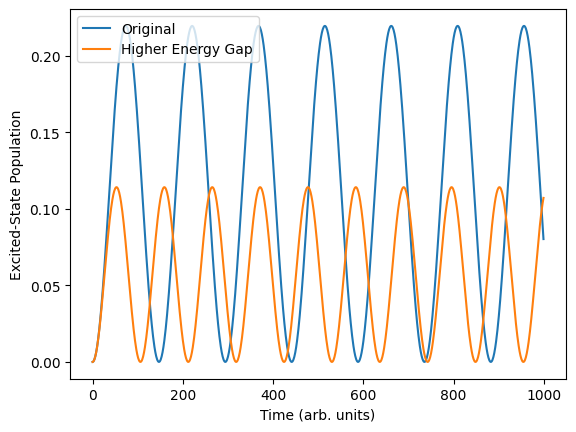

In [5]:
def Simulate(energy_gap , light_frequency, light_intensity, timespan, points):
    ground = basis(2, 0)  # ground
    excite = basis(2, 1)  # excited

    H0 =  - energy_gap * sigmaz()

    def component(t,args):
        return light_intensity(t,args) * np.exp( 1j *light_frequency * t)
    def componentbar(t,args):
        return light_intensity(t,args) * np.exp( -1j *light_frequency * t)

    TR = Qobj(np.array([[0,1],[0,0]]))
    BL = Qobj(np.array([[0,0],[1,0]]))

    H_drivetop = [TR , componentbar]
    H_drivebottom = [BL , component]

    H = [H0, H_drivetop,H_drivebottom]
    
    
    c_ops = []   
    e_ops = [ground*ground.dag(), excite*excite.dag()]
    
    psi0 = ground

    args = {}

    tlist = np.linspace(0, timespan, points)

    result = mesolve(H, psi0, tlist, c_ops, e_ops, args=args)

    return result.expect[1]

plt.plot(Simulate(1.1,np.pi/2,lambda t,args: 1 , 10, 1000),label="Original")
plt.plot(Simulate(2,np.pi/2,lambda t,args: 1 , 10, 1000) ,label="Higher Energy Gap")

   
plt.xlabel('Time (arb. units)')
plt.ylabel('Excited-State Population')
plt.legend()


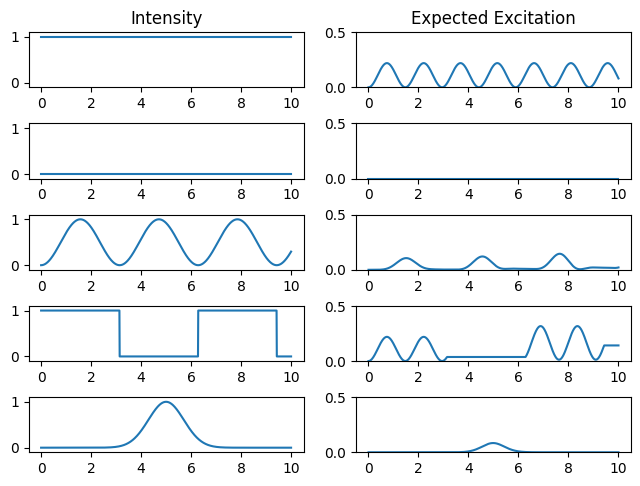

In [61]:
figure, axis = plt.subplots(5,2 )

tlist = np.linspace(0, 10,1000)

# Constant

f=lambda t,args : t*1-t+1

axis[0, 0].plot(tlist, f(tlist, 0))
axis[0, 0].set_title("Intensity")
axis[0,0].set_ylim([-0.1,1.1])

axis[0, 1].plot(tlist,Simulate(1.1,np.pi/2, f , 10, 1000))
axis[0, 1].set_title("Expected Excitation")
axis[0,1].set_ylim([0,0.5])


# 0

f=lambda t,args : t*1-t

axis[1, 0].plot(tlist, f(tlist, 0))
axis[1,0].set_ylim([-0.1,1.1])

axis[1, 1].plot(tlist,Simulate(1.1,np.pi/2, f, 10, 1000))
axis[1,1].set_ylim([0,0.5])


# sin^2

f=lambda t,args : np.sin(t)**2

axis[2, 0].plot(tlist, f(tlist, 0))
axis[2,0].set_ylim([-0.1,1.1])

axis[2, 1].plot(tlist,Simulate(1.1,np.pi/2, f, 10, 1000))
axis[2,1].set_ylim([0,0.5])


# square wave
from scipy import signal
f=lambda t,args : signal.square(t)/2+0.5

axis[3, 0].plot(tlist, f(tlist, 0))
axis[3,0].set_ylim([-0.1,1.1])

axis[3, 1].plot(tlist,Simulate(1.1,np.pi/2, f, 10, 1000))
axis[3,1].set_ylim([0,0.5])


# bump function
f=lambda t,args : np.exp(-(t-5)**2)

axis[4, 0].plot(tlist, f(tlist, 0))
axis[4,0].set_ylim([-0.1,1.1])

axis[4, 1].plot(tlist,Simulate(1.1,np.pi/2, f, 10, 1000))
axis[4,1].set_ylim([0,0.5])

figure.tight_layout(pad=0.5)


In [49]:
f(tlist,0)

array([0.84491545, 0.84491545, 0.84491545, 0.84491545, 0.84491545,
       0.84491545, 0.84491545, 0.84491545, 0.84491545, 0.84491545,
       0.84491545, 0.84491545, 0.84491545, 0.84491545, 0.84491545,
       0.84491545, 0.84491545, 0.84491545, 0.84491545, 0.84491545,
       0.84491545, 0.84491545, 0.84491545, 0.84491545, 0.84491545,
       0.84491545, 0.84491545, 0.84491545, 0.84491545, 0.84491545,
       0.84491545, 0.84491545, 0.84491545, 0.84491545, 0.84491545,
       0.84491545, 0.84491545, 0.84491545, 0.84491545, 0.84491545,
       0.84491545, 0.84491545, 0.84491545, 0.84491545, 0.84491545,
       0.84491545, 0.84491545, 0.84491545, 0.84491545, 0.84491545,
       0.84491545, 0.84491545, 0.84491545, 0.84491545, 0.84491545,
       0.84491545, 0.84491545, 0.84491545, 0.84491545, 0.84491545,
       0.84491545, 0.84491545, 0.84491545, 0.84491545, 0.84491545,
       0.84491545, 0.84491545, 0.84491545, 0.84491545, 0.84491545,
       0.84491545, 0.84491545, 0.84491545, 0.84491545, 0.84491

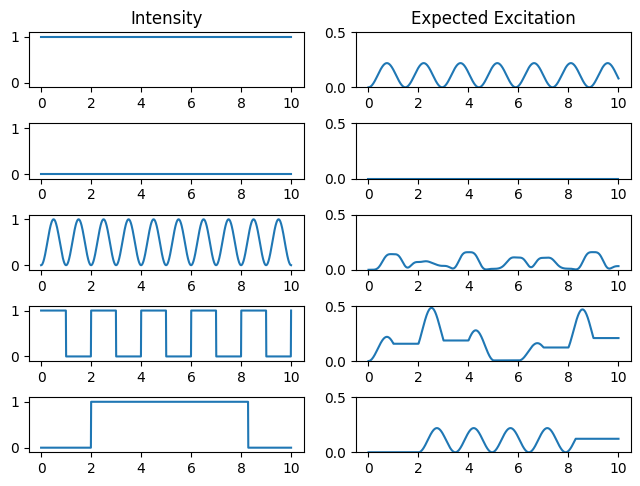

In [9]:
figure, axis = plt.subplots(5,2 )

tlist = np.linspace(0, 10,1000)

# Constant

f=lambda t,args : t*1-t+1

axis[0, 0].plot(tlist, f(tlist, 0))
axis[0, 0].set_title("Intensity")
axis[0,0].set_ylim([-0.1,1.1])

axis[0, 1].plot(tlist,Simulate(1.1,np.pi/2, f , 10, 1000))
axis[0, 1].set_title("Expected Excitation")
axis[0,1].set_ylim([0,0.5])


# 0

f=lambda t,args : t*1-t

axis[1, 0].plot(tlist, f(tlist, 0))
axis[1,0].set_ylim([-0.1,1.1])

axis[1, 1].plot(tlist,Simulate(1.1,np.pi/2, f, 10, 1000))
axis[1,1].set_ylim([0,0.5])


# sin^2

f=lambda t,args : np.sin(t*np.pi)**2

axis[2, 0].plot(tlist, f(tlist, 0))
axis[2,0].set_ylim([-0.1,1.1])

axis[2, 1].plot(tlist,Simulate(1.1,np.pi/2, f, 10, 1000))
axis[2,1].set_ylim([0,0.5])


# square wave
from scipy import signal
f=lambda t,args : signal.square(t*np.pi)/2+0.5

axis[3, 0].plot(tlist, f(tlist, 0))
axis[3,0].set_ylim([-0.1,1.1])

axis[3, 1].plot(tlist,Simulate(1.1,np.pi/2, f, 10, 1000))
axis[3,1].set_ylim([0,0.5])


# bump function
f=lambda t,args : signal.square(t/2 -1)/2+0.5

axis[4, 0].plot(tlist, f(tlist, 0))
axis[4,0].set_ylim([-0.1,1.1])

axis[4, 1].plot(tlist,Simulate(1.1,np.pi/2, f, 10, 1000))
axis[4,1].set_ylim([0,0.5])

figure.tight_layout(pad=0.5)
